## Explore the TF_Bind_8 Dataset

In [13]:
import os
import sys
import numpy as np
import pandas as pd 

In [14]:


TF_BIND_8_FILES = ['tf_bind_8-x-0.npy', 'tf_bind_8-y-0.npy']
def load_tf_bind_8_data(data_dir):
    data = []
    for file_rel_path in TF_BIND_8_FILES:
        file_path = os.path.join(data_dir, file_rel_path)
        if not os.path.exists(file_path):
            print(f"Error: File {file_path} does not exist.", file=sys.stderr)
            continue
        array = np.load(file_path)
        data.append(array)
    return data

data_dir = 'tf_bind_8-SIX6_REF_R1'
tf_bind_8_data = load_tf_bind_8_data(data_dir)
print(f"Loaded {len(tf_bind_8_data)} arrays from TF_BIND_8 dataset.")

Loaded 2 arrays from TF_BIND_8 dataset.


In [12]:
sequences = np.load('tf_bind_8-x-0.npy') 
#display(sequences)
df = pd.DataFrame(sequences)
df.head(10)

,0,1,2,3,4,5,6,7
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,1,1
6,0,0,0,0,0,0,1,2
7,0,0,0,0,0,0,1,3
8,0,0,0,0,0,0,2,0
9,0,0,0,0,0,0,2,1


Decode the data to see the sequence. <br>
Each row is an 8-mer DNA sequence encoded as Integers. <br>
We have 65,792 rows. 

In [19]:
def decode_dna(row):
    mapping = {0: 'A', 1: 'C', 2: 'G', 3: 'T'}
    return ''.join(mapping[i] for i in row)

df['sequence'] = df.apply(decode_dna, axis=1)
df.head(10)

,0,1,2,3,4,5,6,7,sequence
0,0,0,0,0,0,0,0,0,AAAAAAAA
1,0,0,0,0,0,0,0,1,AAAAAAAC
2,0,0,0,0,0,0,0,2,AAAAAAAG
3,0,0,0,0,0,0,0,3,AAAAAAAT
4,0,0,0,0,0,0,1,0,AAAAAACA
5,0,0,0,0,0,0,1,1,AAAAAACC
6,0,0,0,0,0,0,1,2,AAAAAACG
7,0,0,0,0,0,0,1,3,AAAAAACT
8,0,0,0,0,0,0,2,0,AAAAAAGA
9,0,0,0,0,0,0,2,1,AAAAAAGC


In [ ]:
df['binding_scores'] = np.load('tf_bind_8-SIX6_REF_R1/tf_bind_8-y-0.npy')
df.head(10)

,0,1,2,3,4,5,6,7,sequence,binding_scores
0,0,0,0,0,0,0,0,0,AAAAAAAA,0.524750
1,0,0,0,0,0,0,0,1,AAAAAAAC,0.366511
2,0,0,0,0,0,0,0,2,AAAAAAAG,0.446759
3,0,0,0,0,0,0,0,3,AAAAAAAT,0.455201
4,0,0,0,0,0,0,1,0,AAAAAACA,0.512627
5,0,0,0,0,0,0,1,1,AAAAAACC,0.526110
6,0,0,0,0,0,0,1,2,AAAAAACG,0.431194
7,0,0,0,0,0,0,1,3,AAAAAACT,0.445007
8,0,0,0,0,0,0,2,0,AAAAAAGA,0.509081
9,0,0,0,0,0,0,2,1,AAAAAAGC,0.343442


In [21]:
df.to_csv('tf_bind_8-SIX6_REF_R1/dataset.csv', index=False)

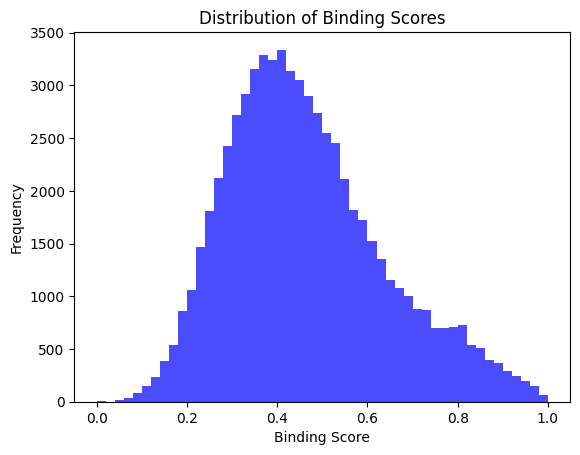

In [23]:
import matplotlib.pyplot as plt

#y_scores = df['binding_scores'].hist(bins=50)
plt.hist(df['binding_scores'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Binding Scores')
plt.xlabel('Binding Score')
plt.ylabel('Frequency')
plt.show()